In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data/combined_data_laliga.csv', sep=',')

In [19]:
df = df.drop('Index', axis=1)

In [20]:
df.head()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,MÁLAGA,ATHLETIC,1-0,1-0,4.4,6.0,5.7,40,60,5.0,...,14.0,9.0,3.0,0.0,0.0,1,0,0,1,2014
1,SEVILLA FC,VALENCIA,1-1,1-0,4.7,6.5,6.8,47,53,4.0,...,16.0,8.0,2.0,0.0,1.0,1,1,1,1,2014
2,GRANADA,DEPORTIVO,2-1,0-1,4.6,7.2,5.9,53,47,6.0,...,14.0,26.0,3.0,0.0,0.0,2,1,1,2,2014
3,ALMERÍA,ESPANYOL,1-1,0-0,5.6,6.9,5.5,56,44,7.0,...,20.0,9.0,3.0,1.0,0.0,1,1,1,1,2014
4,EIBAR,REAL SOCIEDAD,1-0,1-0,3.7,6.5,5.9,41,59,5.0,...,20.0,14.0,1.0,0.0,0.0,1,0,0,1,2014


In [21]:
ftr = []
for i in range(len(df)):
    score = df['Score'][i]
    score = score.split('-')
    home_goals = int(score[0])
    away_goals = int(score[1])
    if home_goals > away_goals:
        ftr.append('H')
    elif home_goals < away_goals:
        ftr.append('A')
    else:
        ftr.append('D')

df['Full Time Result'] = ftr

In [22]:
# Delete stats that are beyond normal match stats and year of the match which in non-relevant
df = df.drop(['Match Excitement', 'Home Team Rating', 'Away Team Rating', 'year'], axis=1)

In [23]:
# Drop team names, teams wont be taken into account, just stats
df = df.drop(['Home Team', 'Away Team'], axis=1)

In [24]:
# full time goals scored could result in data leakage in machine learning models therefore these stats should be dropped.
df = df.drop(['Home Team Goals Scored', 'Home Team Goals Conceeded', 'Away Team Goals Scored', 'Away Team Goals Conceeded'], axis=1)

In [25]:
# Drop redundant data, second yellow card = red card which is already in the dataset
df = df.drop(['Home Team Second Yellow Cards', 'Away Team Second Yellow Cards'], axis=1)

In [26]:
df.head()

,Score,Half Time Score,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,...,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Red Cards,Full Time Result
0,1-0,1-0,40,60,5.0,3.0,12.0,4.0,5.0,13.0,...,2.0,4.0,22.0,84.0,17.0,14.0,9.0,3.0,0.0,H
1,1-1,1-0,47,53,4.0,3.0,12.0,5.0,3.0,20.0,...,5.0,3.0,27.0,79.0,14.0,16.0,8.0,2.0,1.0,D
2,2-1,0-1,53,47,6.0,3.0,10.0,1.0,5.0,25.0,...,6.0,3.0,30.0,76.0,10.0,14.0,26.0,3.0,0.0,H
3,1-1,0-0,56,44,7.0,6.0,19.0,6.0,11.0,26.0,...,4.0,7.0,19.0,70.0,11.0,20.0,9.0,3.0,0.0,D
4,1-0,1-0,41,59,5.0,5.0,12.0,2.0,5.0,28.0,...,8.0,6.0,36.0,75.0,25.0,20.0,14.0,1.0,0.0,H


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Score                       2660 non-null   object 
 1   Half Time Score             2660 non-null   object 
 2   Home Team Possession %      2660 non-null   int64  
 3   Away Team Possession %      2660 non-null   int64  
 4   Home Team Off Target Shots  2660 non-null   float64
 5   Home Team On Target Shots   2660 non-null   float64
 6   Home Team Total Shots       2660 non-null   float64
 7   Home Team Blocked Shots     2660 non-null   float64
 8   Home Team Corners           2660 non-null   float64
 9   Home Team Throw Ins         2660 non-null   float64
 10  Home Team Pass Success %    2660 non-null   float64
 11  Home Team Aerials Won       2660 non-null   float64
 12  Home Team Clearances        2660 non-null   float64
 13  Home Team Fouls             2660 

In [28]:
df.isnull().values.any()

False

In [29]:
df.isnull().sum().sum()

0

In [30]:
df.describe()

,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,...,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Red Cards
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,51.541729,48.458271,5.532707,4.648496,13.078195,2.912782,5.395113,22.495865,77.710902,17.101504,...,10.359023,2.390602,4.215414,21.478947,75.896241,16.751880,21.427444,13.770301,2.640977,0.048872
std,11.153892,11.153892,2.696240,2.506880,4.814410,1.997532,2.833192,6.832685,7.818760,7.642850,...,4.266337,1.839270,2.516853,6.372888,8.422720,7.438964,9.337776,4.166010,1.474126,0.224192
min,18.000000,17.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,46.000000,2.000000,...,0.000000,0.000000,0.000000,3.000000,41.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,44.000000,41.000000,4.000000,3.000000,10.000000,1.000000,3.000000,18.000000,73.000000,12.000000,...,7.000000,1.000000,2.000000,17.000000,71.000000,11.000000,14.000000,11.000000,2.000000,0.000000
50%,52.000000,48.000000,5.000000,4.000000,13.000000,3.000000,5.000000,22.000000,78.000000,16.000000,...,10.000000,2.000000,4.000000,21.000000,77.000000,16.000000,20.000000,13.000000,3.000000,0.000000
75%,59.000000,56.000000,7.000000,6.000000,16.000000,4.000000,7.000000,27.000000,84.000000,22.000000,...,13.000000,3.000000,6.000000,26.000000,82.000000,21.000000,27.000000,16.000000,4.000000,0.000000
max,83.000000,82.000000,18.000000,17.000000,33.000000,12.000000,20.000000,49.000000,93.000000,52.000000,...,28.000000,13.000000,32.000000,45.000000,93.000000,53.000000,63.000000,30.000000,8.000000,2.000000


In [31]:
df = df.drop([ "Score", "Half Time Score"], axis=1)

C:\Users\piotr\AppData\Local\Temp\ipykernel_11280\1174828940.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df.corr(method="spearman"), annot=True)


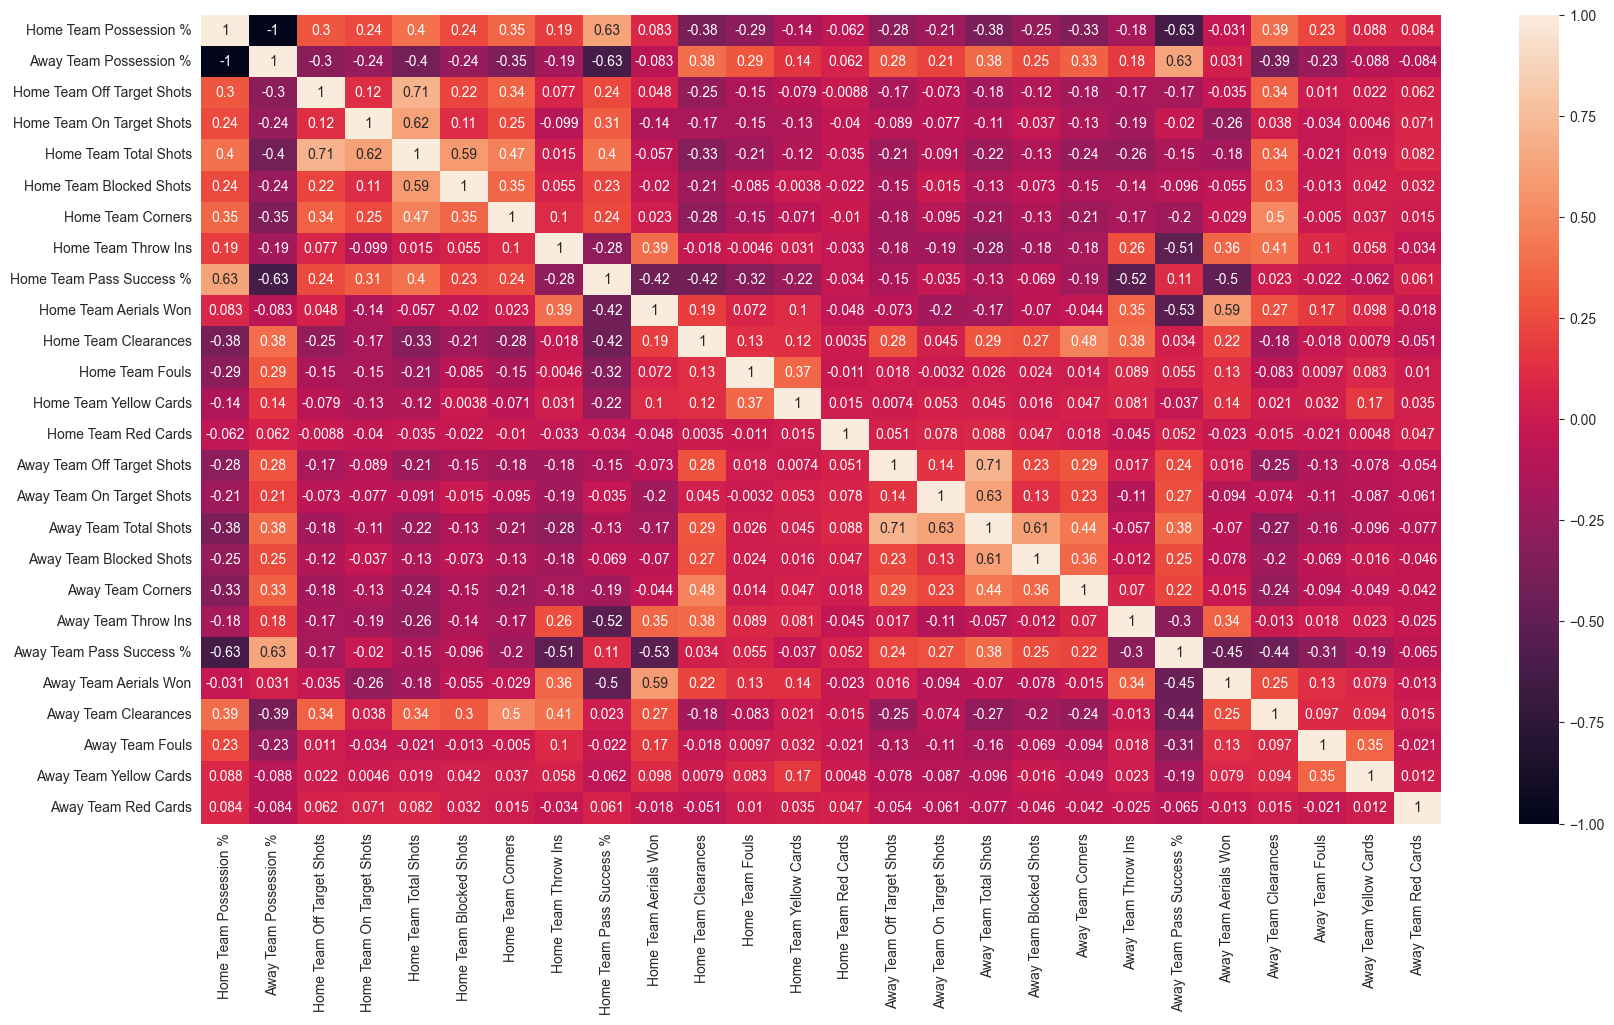

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
dataplot=sns.heatmap(df.corr(method="spearman"), annot=True)
plt.show()

We can observe correlation between Home/Away Total Shoots, On Target Shots, Off Target Shots and Blocked Shots. Because in most cases on target shots (apart from own goals) are the most decisive in terms of number of goals scored which converts to match final outcome and basing on others research study other three stats will be dropped.

We can also observe perfect negative correlation between home and away % possession, it will always be Away = 100 - Home and vice versa.
 Away possession will be dropped so only one stat remains.

In [33]:
df = df.drop(["Home Team Total Shots", "Home Team Blocked Shots", "Home Team Off Target Shots",
              "Away Team Total Shots", "Away Team Blocked Shots", "Away Team Off Target Shots",
              "Away Team Possession %", "Home Team Aerials Won"], axis=1)

C:\Users\piotr\AppData\Local\Temp\ipykernel_11280\3159460396.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df.corr(), annot=True)


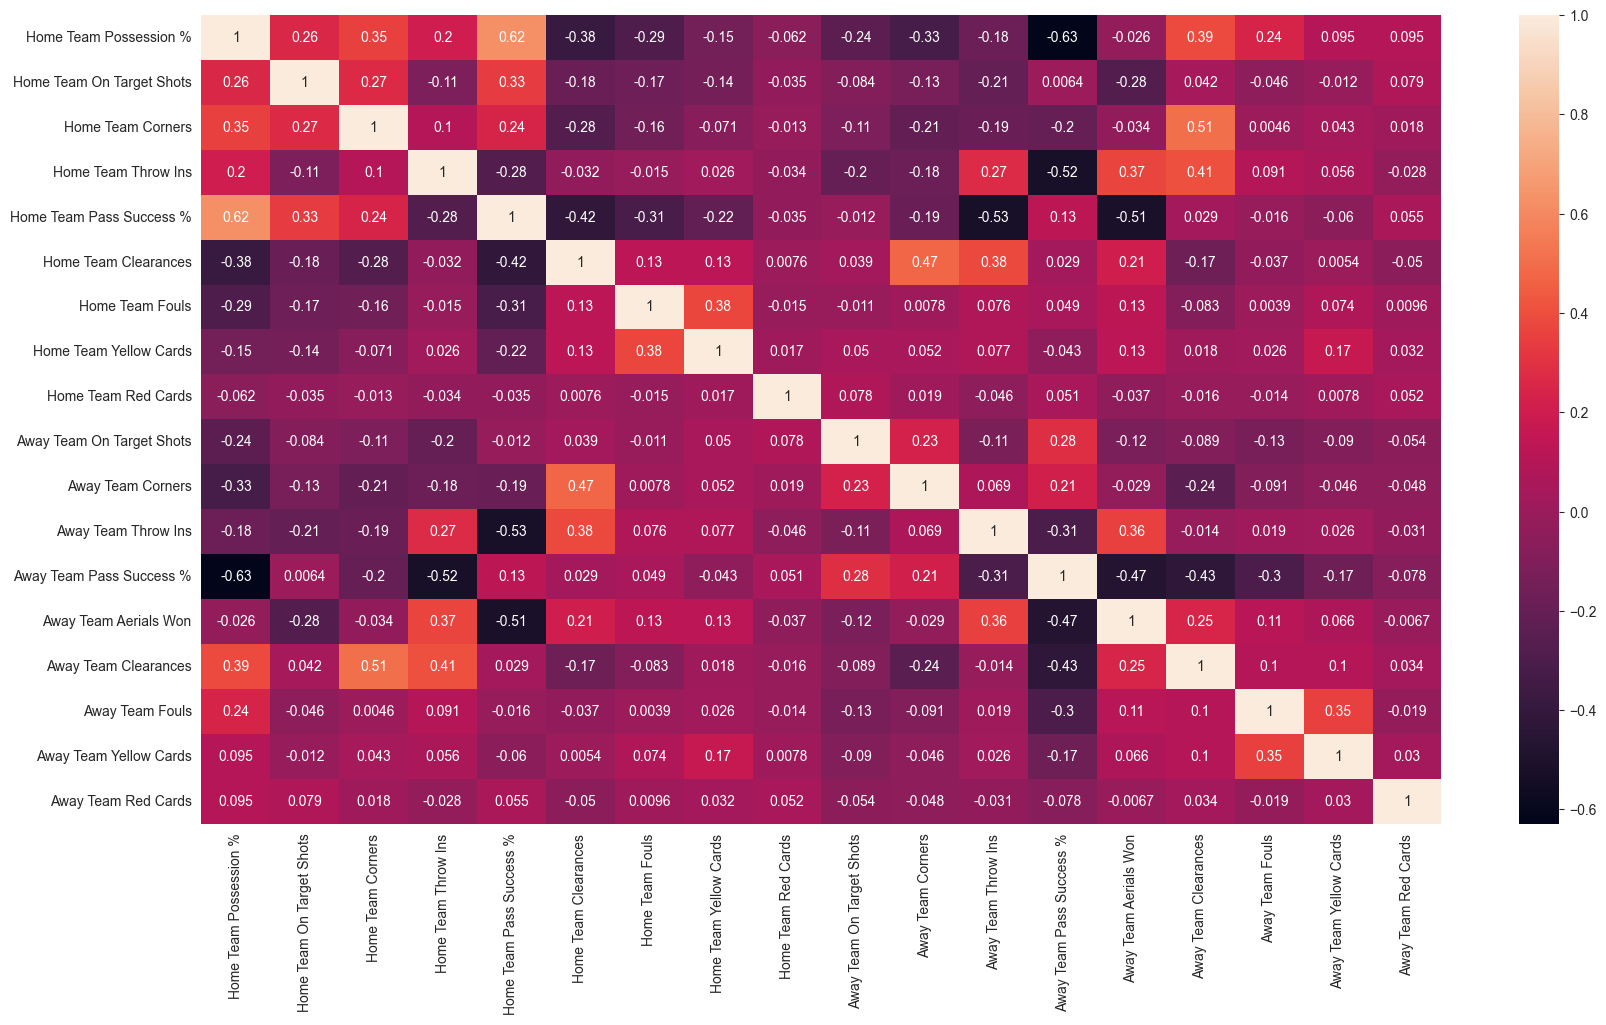

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
dataplot=sns.heatmap(df.corr(), annot=True)
plt.show()

After removing previously mentioned stats we are left with variables that create much better correlation heatmap and can proceed with machine learning tasks.

In [35]:
df.to_csv('data/final_data.csv')